# Computer Vision
# Level 2

#### Kyle Stahl
#### Feb. 2018

## **Introduction**

This is the second installment in a series of walk-throughs to create computer vision with python. The first can be found here: (https://kyle-stahl-mn.com/computer-vision-1/) and goes though how the data is imported and prepocessed in python, so that will be passed over in this document. This tutorial will focus more on the functionality of scikit-learn and the typical machine learning process. 

The data we are using is from the MNIST data set. We are trying to teach an algorithm to recognize which of the 10 digits, 0 - 9, are written down on a 28x28 pixel image. Last tutorial we created 10 logisitc regressions, and each regession would try and identify one of the digits. For each image, we would get the probability that it is a 1, or a 7, or a 4, and so on... Our final 'guess' which digit the image contained was just a matter of figuring out which model predicted the highest probability. 

Now we are going to create a basic feed-foward neural network. This works somewhat similarly to what was created last time, except we add an extra layer that is going to find inter-actions between all of the independent variables (pixel values). In the image below, each node can be thought out as an `activation` or a transformation that will take in all of it's inputs, and then output a single value. Each of the arrows can be thought of as a weight value, or a multiplier on a connection between two nodes. I am going to spare you the math behind how this algorithm learns all of the weights, so I can focus on showing how scikit-learn works for implementing this algorithm. But here are some resources if you want to know more about the math. It will require some knowledge of linear algebra and multivariable calculus. I highly reccomend this series of videos from Welch Labs: https://www.youtube.com/watch?v=bxe2T-V8XRs&t=69s. There are 7 roughly 5 - 10 min videos.

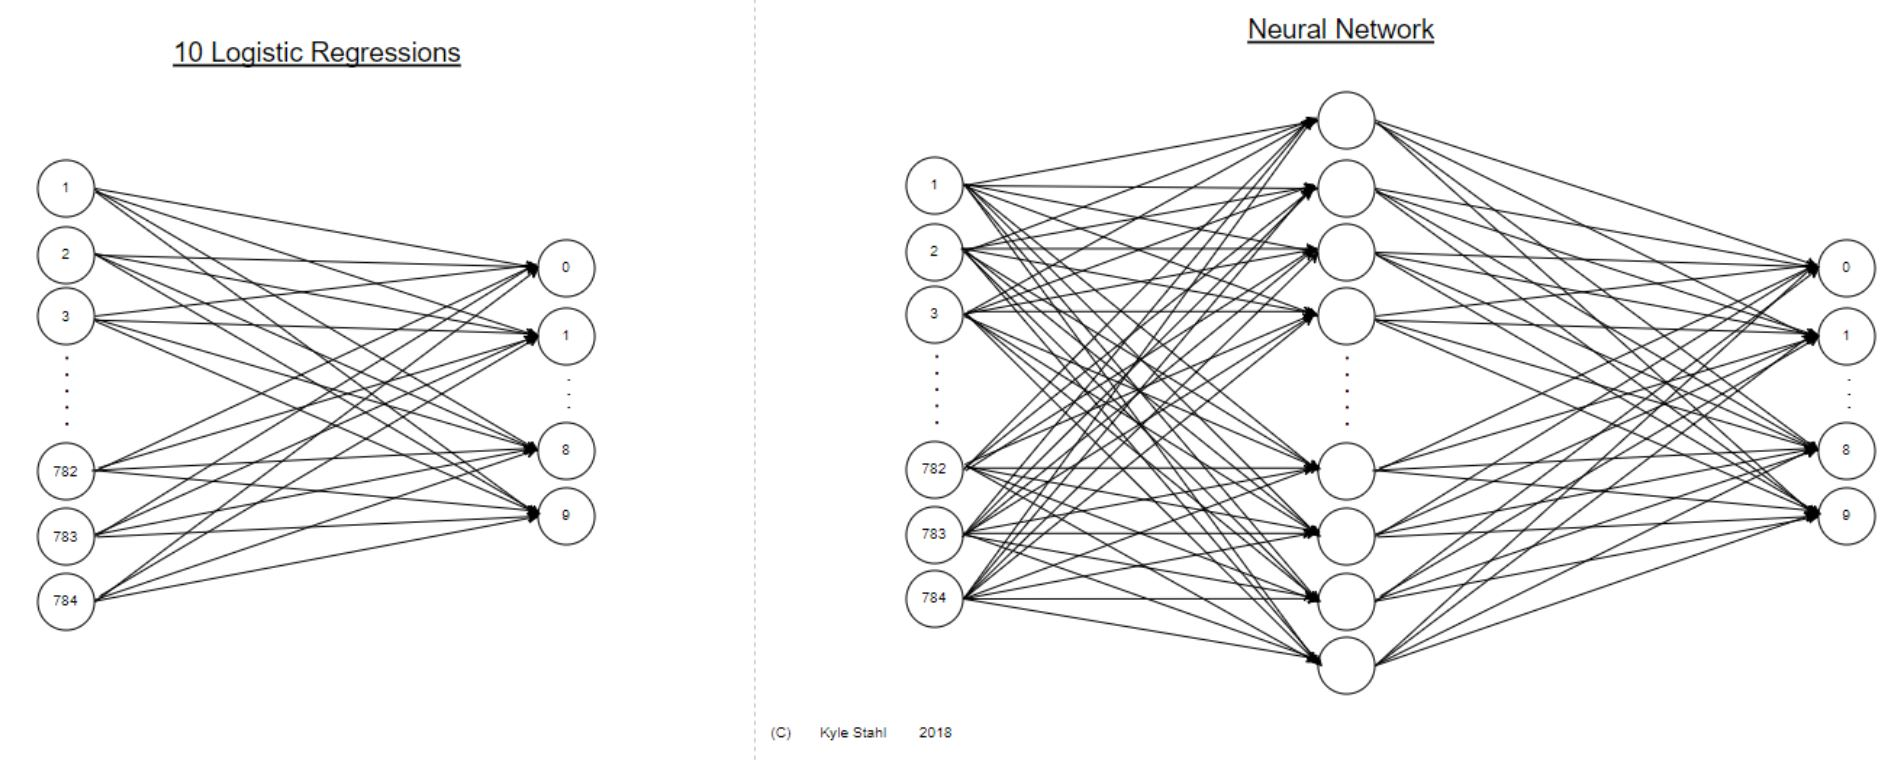

In [1]:
from IPython.display import Image
Image("C:\\Users\\kyles\\Desktop\\NNETgraphic.JPG")

## **Import Packages and Modules**

In [2]:
# Change directory to where the photos are downloaded
import os
os.chdir("C:\\Users\\kyles\\Downloads\\TrainingSet")

# OpenCV package will be used to bring images in as numpy arrays
import cv2

# tqdm is used to track the progress of loops
from tqdm import tqdm

# Numpy and pandas for data manipulation
import pandas as pd
import numpy as np

# Scikit-learn for model building
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Images and Graphing
from matplotlib import pyplot as plt

## **Import and Clean Data**
For a walk-through on how this works, check out the first tutorial (link above)...

In [3]:
data = np.zeros([42000,784])
label = []
for i in range(10):
    for j in tqdm(range(42000)):
        img = cv2.imread(str(i) + "/img_" + str(j) + ".jpg")
        if img is not None:
            data[j,:] = img.mean(axis = 2).flatten()
            label.append(i) 

100%|██████████████████████████████████████████████████████████████████████████| 42000/42000 [00:08<00:00, 5198.41it/s]


In [4]:
data = np.zeros([42000,784])
label = []
for i in tqdm(range(42000)):
    img = cv2.imread("0/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(0)
        continue
    img = cv2.imread("1/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(1)
        continue
    img = cv2.imread("2/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(2)
        continue
    img = cv2.imread("3/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(3)
        continue
    img = cv2.imread("4/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(4)
        continue
    img = cv2.imread("5/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(5)
        continue
    img = cv2.imread("6/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(6)
        continue    
    img = cv2.imread("7/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(7)
        continue
    img = cv2.imread("8/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(8)
        continue
    img = cv2.imread("9/img_" + str(i) + ".jpg")
    if img is not None:
        data[i,:] = img.mean(axis = 2).flatten()
        label.append(9)
        continue
        
# Now there is only one progress bar because we are searching through all the folders at once.

100%|███████████████████████████████████████████████████████████████████████████| 42000/42000 [01:06<00:00, 628.72it/s]


In [5]:
Y = pd.Series(label)
X = pd.DataFrame(data)
print("Dependent Variable (digit in image):")
print(Y.sample(10))
print("\n Independent Variables (pixel values):")
X.head()

Dependent Variable (digit in image):
39240    9
13223    7
31738    8
38762    6
38533    2
28323    0
9851     2
37295    8
21431    5
33934    4
dtype: int64

 Independent Variables (pixel values):


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,3.0,7.0,3.0,0.0,3.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0,3.0,...,0.0,0.0,13.0,11.0,1.0,6.0,0.0,0.0,0.0,0.0
4,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Preprocess the Data**

The first step is to split the information into training and testing sets. Scikit-learn has a nice function to do this for us http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. Generally, you want more data in the training set than the test set. Popular splitting options are 60/40, 70/30, 80/20... but you can chose to do whatever pleases you. I chose 60/40 because that would have less data in the training set to (slightly) speed up the training process.

In [6]:
# train test split
print("Before train/test split")
print("X shape: {}".format(X.shape))
print("Y shape: {} \n".format(Y.shape))
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.40, random_state=530)
print("After train/test split")
print("Xtrain shape: {}".format(Xtrain.shape))
print("Xtest shape: {}".format(Xtest.shape))
print("Ytrain shape: {}".format(Ytrain.shape))
print("Ytest shape: {}".format(Ytest.shape))

Before train/test split
X shape: (42000, 784)
Y shape: (42000,) 

After train/test split
Xtrain shape: (25200, 784)
Xtest shape: (16800, 784)
Ytrain shape: (25200,)
Ytest shape: (16800,)


The next step is to take our single label variable with 10 different values, and convert it into 10 different binary variables that only take on values of `0` or `1`. This is the same step in the last walk through when we ran the code:        
`zeros  = (Ytrain == 0)       
ones   = (Ytrain == 1)    
...    
eights = (Ytrain == 8)    
nines  = (Ytrain == 9) `           
But now we are using scikit-learn's `LabelBinarizer()` object to do this for us http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html. We just tell it what values it needs to make into binary variables and it returns the transformation with the `.transform()` method. This should not be confused with the functionality of sklearn's `OneHotEncoder()`, which does the same transformation but for the independent variables http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html.

In [7]:
onehotlabeler = LabelBinarizer()
onehotlabeler.fit(np.array([0,1,2,3,4,5,6,7,8,9]))
Ytrain = onehotlabeler.transform(Ytrain)
Ytest = onehotlabeler.transform(Ytest)
print("Dependent variables after transformation: ")
print("Ytrain shape: {}".format(Ytrain.shape))
print("Ytest shape: {}".format(Ytest.shape))

Dependent variables after transformation: 
Ytrain shape: (25200, 10)
Ytest shape: (16800, 10)


Now we are going to preprocess the pixel values. In many machine learning algorithms, it is required, or at least standard practice, to so some sort of scaling or normalization on the input variables. We are going to train/validate the model on four different training sets to see which gives the best performance: global scaling (just divide all values by the max value to put everything on a 0-1 scale), Z-score normalization: https://docs.tibco.com/pub/spotfire/6.5.1/doc/html/norm/norm_z_score.htm, min-max scaling: https://rasbt.github.io/mlxtend/user_guide/preprocessing/minmax_scaling/, and then no normaliztion/scaling (control set). 

In [8]:
Xtrain_scaled = Xtrain / 255
Xtest_scaled = Xtest / 255

minmaxer = MinMaxScaler()
minmaxer.fit(Xtrain)
Xtrain_minmax = minmaxer.transform(Xtrain)
Xtest_minmax = minmaxer.transform(Xtest)

normalizer = Normalizer()
normalizer.fit(Xtrain)
Xtrain_normalized = normalizer.transform(Xtrain)
Xtest_normalized = normalizer.transform(Xtest)


_Note_: Dividing everything by 255 will be the same as the min-max scaling for some variables, because some pixels range from 0-255 in instensity. But for some pixels the range isn't 0-255 (like the corners which rarely get drawn in) so minmax scaling would results in a different transformation. 

## **Model Building**
### Grid Search Cross Validation

Cross validation allows you to utilize your whole training set to find the optimal parameters for the algorithm; the alternative would be to split the original data into separate train, test, and validation sets. A normal K-fold cross validation would split your data into, let's say 10 different sets (k=10). Then it would iterate through 10 different training and testing cycles of the model. Each time 1 of the ten folds would be set aside for testing, and the other 9 would be used to train the model. This gives you two advantages. First, you can get a better view of how accurate the model is going to be on new data. You will get the average error, and standard deviation of the error across all the folds. Second, now you have predictions for every value in the training/cross validation set, so your sample size of observations that you have errors for is a lot larger than if your had separate training and validation sets.

Many machine learning models have a few different parameters that need to be tuned to get optimal performance. Grid search cross validation iterates through all the different combination of parameter that we specify, then performs a K-fold cross validation for each parameter combination. This gives us a wholistic view of the performance of the algorithm with each set of parameters, so we can chose the (somewhat) optimal values http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. The downside to this method is that sometimes it can take a LONG time for it to run. For example, lets say you want to tune the parameters of a random forrest algorithm with 10 fold cross validation. And you want to try 2 different split criterion, 5 different maximum depths, 5 different mimimum samples in any leaf, 3 different levels for the maximum amount of features to consider, and do a 10 fold cross validation. This means you need to train and test the model  2x5x5x3x10 = 1,500 different times.

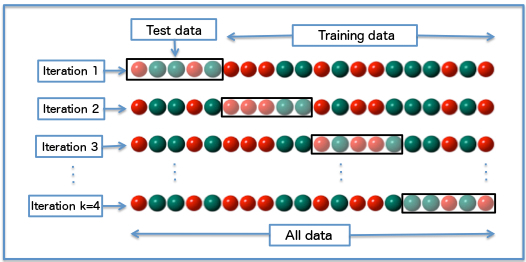

In [9]:
Image("C:\\Users\\kyles\\Desktop\\cross-validation.JPG")
# Image credit to Wikipedia... shoutout to wikipedia for all that you do
# original image creator User:Joan.domenech91
# Created: 20 September 2016

In some scenarios, we don't care about the accuracy of the machine learning solution. Think of a scenario where you are developing a machine learning model to predict fraudulent credit card transactions. 99.99% of transactions will not be fraudulent. So if you created a model that 100% of the time would predict that all transactions are not fraudlent, that model would be exteremly accurate... but it would be essentially useless to you. Sometimes we might only care what percent of positive cases get identified (the model predicts a `1` and the actual value is a `1`). Other times, we might value false postives and false negatives differently (would you rather have your spam email classifier accidently miss some spam and let it through? or take emails that are not spam and put it in the spam folder?). 

I wanted to talk about this mostly to illustrate scikit-learns flexibility when it comes to performance metrics. Each fold in the cross validation will calculate all three metrics below, which will give us a better overall view of the model performance for each parameter combination. More inforamtion about what these parameters represent can be found at the following links:        
http://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation          
https://en.wikipedia.org/wiki/F1_score        

In [10]:
performance_metrics = {"f-measure" : "f1_macro",
                        "accuracy" : "accuracy",
                       "precision" : "precision_micro"}

As I mentioned above we are going to iterate through different combinations of model parameters. Here we are going to define which parameters we want to change and what values they should take on. The `hidden_layer_sizes` parameter tells how many nodes we want in that middle layer of the network (see image at the top), and how many middle layers we want. We are going to try two different options, the first will be one hidden layer with 700 nodes, and the second will be two hidden layers with 700 and 350 nodes respectively. Each node in a hidden layer takes all the outputs from the previous layer, applies some function to them, and then gives an output to the next layer. Currently there is not a hueristic to determine hidden layer sizes; however, there are some general guidelines. For most problems, one hidden layer will suffice. Common sizes of the hidden layer could be roughly the size of the input layer, or half way between the input and output layer (https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw).

The `alpha` parameter controls how much regularization the uses. By _regularization_ I am refering to how much the model penalizes the weights that connect each node from getting too large. Without regularizing these weights, we at more at risk to overfit our training data and creating a model that does not generalize to new information. 

And finally there is the activation function. This is the function that is applied to the output of every node. We are testing the performance of two different activation functions `logistic` and `relu`. There are a few more that exist in practice, but we are just focusing on these two. The logistic regression in the previous tutorial used the `logistic` activation function, and the convolution neural network in the next tutorial will use the `relu`; but in this case we can use either. Graphs of the activation functions can be found below.

More information about the different parameters you can tune in this type of neural network can be found in the documentation:     
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

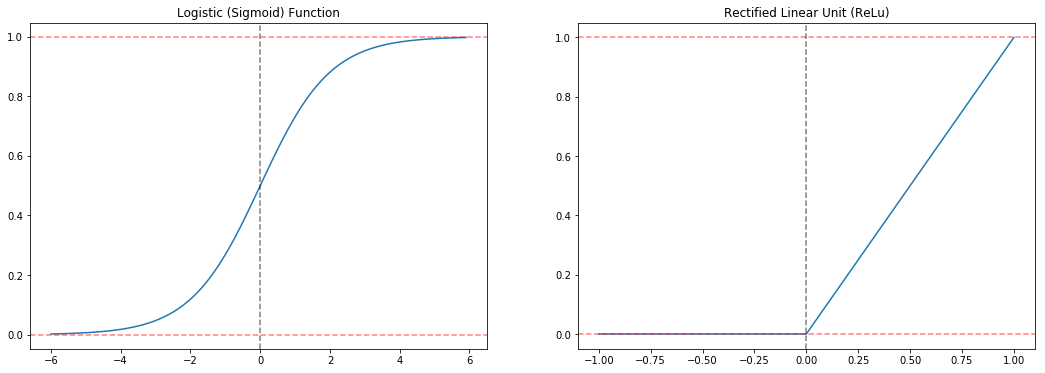

In [11]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [18.0,6.0]
x = np.arange(-6,6,0.1)
y = 1 / (1 + np.exp(-x))
z = np.arange(-1,1.01,0.01)
f, p = plt.subplots(1, 2)
p[0].plot(x,y)
p[0].axhline(y=1.0, color='red', linestyle='--', alpha=0.5)
p[0].axhline(y=0.0, color='red', linestyle='--', alpha = 0.5)
p[0].axvline(x=0.0, color='black', linestyle='--', alpha=0.5)
p[0].title.set_text("Logistic (Sigmoid) Function")
p[1].plot(z,np.maximum(0,z))
p[1].axhline(y=1.0, color='red', linestyle='--', alpha=0.5)
p[1].axhline(y=0.0, color='red', linestyle='--', alpha = 0.5)
p[1].axvline(x=0.0, color='black', linestyle='--', alpha=0.5)
p[1].title.set_text("Rectified Linear Unit (ReLu)")

In [12]:
nnet_params = {'hidden_layer_sizes' : [(500), (500,250)],
               'activation' : ['logistic','relu'],
               'alpha' : [.0001, .01]}

Now we can define the scikit-learn grid search cross validation object. We initialize it with the type of classifier we want to use `MLPClassifier()`. The we set `cv` to 3, which is the number of folds we want in each cross validation. I chose three because this training is going to take a long time, and more folds would make it take much longer. Then we pass it the parameters and scoring metrics we jsut defined. Next, we define which scoring metric should be used as the primary metric when the algoirthm saves the `best.estimator` and `best.score` attributes. The `verbose` parmeter controls whether or not text is printed to the screen to track the training progress. And `n_jobs` controls how many cpu's you want to run on, which will allow training to happen in parallel. My computer has 4 cpu's, so I set the value to 3 which gives me one processor to do other things while I am training the models. 

In [13]:
import warnings
warnings.filterwarnings('ignore')

NNET_gridsearch = GridSearchCV(MLPClassifier(batch_size = 2048, max_iter = 8), cv=3,
                               param_grid = nnet_params,
                               scoring=performance_metrics, 
                               refit = "accuracy",
                               verbose = True,
                               n_jobs = 3)


**Note: ** `batch_size` *and* `max_iter` *will be covered in the next tutorial (http://www.kyle-stahl-mn.com/computer-vision-3) These were mostly to control how long this takes to train. Also, it stops the training process before the optimizer converges at the global minimum, which is okay because it gets close enough. But this will output a bunch of non-convergence warnings. That is what the* `warnings.filterwarnings('ignore')` is about. *Another probably more valid solution would have been to shrink the* `tol` *parameter; which sets at what tolerance of improvement is too little and training should stop... or you could set* `early_stopping = True` *which will set aside a validation set and stop training when the performance on the validation set does not increase by a certain threshold. But to each their own, stop training whenever you feel like the time is right :)*

Now we fit the grid search cross validator with all of the different training sets and save the results. After the training on each dataset, we save the results of every cross validation in a dataframe, and then specify which preprocessing technique was used for that sample. This will allow us to get a holistic review of the results at the end. We also save the `best_estimator_` of each round of training; so at the end of it all we will not have to re-train the optimal model. 

In [14]:
NNET_gridsearch.fit(Xtrain, Ytrain)
results_X = pd.DataFrame(NNET_gridsearch.cv_results_)
results_X['preprocessing'] = 'none'
best_no_preprocessing = NNET_gridsearch.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:  3.8min finished


In [15]:
NNET_gridsearch.fit(Xtrain_scaled,Ytrain)
results_Xscaled = pd.DataFrame(NNET_gridsearch.cv_results_)
results_Xscaled['preprocessing'] = 'scaled'
best_scaled = NNET_gridsearch.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:  3.9min finished


In [16]:
NNET_gridsearch.fit(Xtrain_scaled,Ytrain)
results_Xminmax = pd.DataFrame(NNET_gridsearch.cv_results_)
results_Xminmax['preprocessing'] = 'minmax'
best_minmax = NNET_gridsearch.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:  3.6min finished


In [17]:
NNET_gridsearch.fit(Xtrain_scaled,Ytrain)
results_Xnorm = pd.DataFrame(NNET_gridsearch.cv_results_)
results_Xnorm['preprocessing'] = 'norm'
best_norm = NNET_gridsearch.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:  3.6min finished


## **Model Evaluation**

Now that we have results for all the different parmeter combinations and training sets we can combine the results into a data frame and look at what conditions yielded the best results. 

In [18]:
results = results_X.append([results_Xscaled, results_Xminmax, results_Xnorm])
results.sort_values(by='mean_test_accuracy',inplace=True,ascending=False)
results[['param_alpha','param_hidden_layer_sizes','param_activation','preprocessing',
         'mean_test_accuracy','mean_test_f-measure','mean_test_precision']].head(10)

,param_alpha,param_hidden_layer_sizes,param_activation,preprocessing,mean_test_accuracy,mean_test_f-measure,mean_test_precision
7,0.01,"(500, 250)",relu,minmax,0.862659,0.908094,0.941995
5,0.0001,"(500, 250)",relu,scaled,0.862222,0.907993,0.940923
7,0.01,"(500, 250)",relu,norm,0.860119,0.906441,0.938868
7,0.01,"(500, 250)",relu,scaled,0.859405,0.906208,0.937266
5,0.0001,"(500, 250)",relu,norm,0.858929,0.905932,0.942043
5,0.0001,"(500, 250)",relu,minmax,0.858532,0.906070,0.938021
4,0.0001,500,relu,none,0.831071,0.893237,0.889101
5,0.0001,"(500, 250)",relu,none,0.829405,0.891740,0.890269
7,0.01,"(500, 250)",relu,none,0.829167,0.891025,0.893413
6,0.01,500,relu,none,0.817817,0.886220,0.882452


Now we can chose the algorithm that performed the best, averaged across all folds an see how it performs on the test set. It looks like the 'relu' activation function is clearly the better choice, and two hidden layers performed better than one. There is a mix of different alpha parameters, so the optimal is probably somwhere in the middle. And all the types of preprocessing did fairly well. I will go ahead with the scaled preprocessing (divided all by 255) since it had 2 folds in the top 5, and did not do much worse than the top performing combination. 

In [19]:
(best_scaled.predict(Xtest) == Ytest).mean()

0.98509523809523813

## **Next Steps**

This performed better than the separate logistic regressions, and a lot better than I expected (~95%), but it still isn't as good as we would like it to be. There are three techniques that could be used to (hopefully) improve model performance:
 - __Stacking__: this involves training multiple different versions of the same model on different subsets of the training data. Then aggregating the results in some way. You could take a majority vote from all the model, or average the predicted probabilities of all the models, etc.
 - __Adaptive Boosting__: this is similar to stacking, except instead of randomly selecting training examples to put in the model, you give more weight to the samples which are harder to predict, and less weight to the ones that are easy to predict. So if one observation is continuously predicted incorrectly, then it would have a higher probability of getting selected for the next training subset than samples that are being correctly classified. This sampling is also done with replacement, so the same observation can show up in a training sample more than once. Scikit-learn has an object that will implement this for you http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
 - __Gradient Boosting__: This involved training a model to fit the error of another model. Essentially your are trying to predict the error of the base model, and add that deviation back on to the original prediction for a slight accuracy boost. This video explains it well: https://www.youtube.com/watch?v=sRktKszFmSk

The next tutorial will go over Convolutional Neural Networks and Implementing them with the Keras deep learning API which is built on top of TensorFlow (http://kyle-stahl-mn.com/computer-vision-3/). CNN's are more complicated, but they can take advantage of pixel locations relative to each other so they can be more accurate for image recognition tasks. Since Keras is built on top of TensorFlow, and tensorflow can run on a GPU, we will gain more computational efficiency. 